In [1]:
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql.functions import regexp_replace, col, when

In [2]:
spark = SparkSession.builder.appName("test1").getOrCreate()

In [65]:
# json_df = spark.read.json("laptop_prices.json")
json_df = spark.read.option("multiLine", "true").json("laptop_prices.json")
json_df.show()

+---+--------+
| id|   price|
+---+--------+
|  1|   $1200|
|  2|     950|
|  3|1000 USD|
|  4|    1200|
|  5|   $1300|
|  6|        |
|  7|    1100|
|  8|     900|
|  9|     950|
| 10|   $1000|
| 11|1250 USD|
| 12|        |
| 13|    1100|
| 14|    $950|
| 15|    1000|
| 16|    1200|
| 17|   $1100|
| 18|        |
| 19|1300 USD|
| 20|     950|
+---+--------+
only showing top 20 rows



In [4]:
# df.show(): Quick view of a limited number of rows, designed for human-readable output in the console.
# df.collect(): Fetches all data from the DataFrame into a list of rows in the driver node, 
# which can be useful for further local processing but should be used carefully with large datasets.
# json_df.collect()
# json_df.show()


In [27]:
pandas_df = pd.read_excel("laptop_sales.xlsx")


In [6]:

xls_df = spark.createDataFrame(pandas_df)

In [7]:
# json_df1 = json_df.withColumn("price", regexp_replace("price", "[$, USD]", "").cast("int"))
json_df1 = json_df.withColumn("price", regexp_replace("price", r"[\$, USD]", "").cast("int"))
json_df2 = json_df1.na.fill({"price": 1000})

xls_df1 = xls_df.withColumn("units_sold", when(col("units_sold").rlike("^[0-9]+$"), col("units_sold")).cast("int"))
xls_df2 = xls_df1.na.fill({"units_sold": 50})

In [8]:

# json_df.show()
xls_df.show()

+---+----------+------------------+------------+
| id|units_sold|             model|        city|
+---+----------+------------------+------------+
|  1|        50|       Dell XPS 13|    New York|
|  2|        40|   HP Spectre x360| Los Angeles|
|  3|   "fifty"|Lenovo ThinkPad X1|     Chicago|
|  4|       NaN|    MacBook Pro 13|     Houston|
|  5|        60|  Surface Laptop 4|     Phoenix|
|  6|        45|       Dell XPS 15|Philadelphia|
|  7|   "forty"|        HP Envy 13| San Antonio|
|  8|        55|      Acer Swift 3|   San Diego|
|  9|        48|   Asus ZenBook 14|      Dallas|
| 10|       NaN|       MacBook Air|    San Jose|
| 11|        65|        LG Gram 17|    New York|
| 12|        42|    HP Pavilion 15| Los Angeles|
| 13|        38|    Lenovo IdeaPad|     Houston|
| 14|        51|  Dell Inspiron 15|     Phoenix|
| 15|        49| Microsoft Surface|Philadelphia|
| 16|        54|       Dell XPS 13| San Antonio|
| 17|        59|   HP Spectre x360|   San Diego|
| 18|       NaN|Leno

In [9]:
# json_df1.show()
xls_df1.show()

+---+----------+------------------+------------+
| id|units_sold|             model|        city|
+---+----------+------------------+------------+
|  1|        50|       Dell XPS 13|    New York|
|  2|        40|   HP Spectre x360| Los Angeles|
|  3|      NULL|Lenovo ThinkPad X1|     Chicago|
|  4|      NULL|    MacBook Pro 13|     Houston|
|  5|        60|  Surface Laptop 4|     Phoenix|
|  6|        45|       Dell XPS 15|Philadelphia|
|  7|      NULL|        HP Envy 13| San Antonio|
|  8|        55|      Acer Swift 3|   San Diego|
|  9|        48|   Asus ZenBook 14|      Dallas|
| 10|      NULL|       MacBook Air|    San Jose|
| 11|        65|        LG Gram 17|    New York|
| 12|        42|    HP Pavilion 15| Los Angeles|
| 13|        38|    Lenovo IdeaPad|     Houston|
| 14|        51|  Dell Inspiron 15|     Phoenix|
| 15|        49| Microsoft Surface|Philadelphia|
| 16|        54|       Dell XPS 13| San Antonio|
| 17|        59|   HP Spectre x360|   San Diego|
| 18|      NULL|Leno

In [10]:
# json_df2.show()
xls_df2.show()

+---+----------+------------------+------------+
| id|units_sold|             model|        city|
+---+----------+------------------+------------+
|  1|        50|       Dell XPS 13|    New York|
|  2|        40|   HP Spectre x360| Los Angeles|
|  3|        50|Lenovo ThinkPad X1|     Chicago|
|  4|        50|    MacBook Pro 13|     Houston|
|  5|        60|  Surface Laptop 4|     Phoenix|
|  6|        45|       Dell XPS 15|Philadelphia|
|  7|        50|        HP Envy 13| San Antonio|
|  8|        55|      Acer Swift 3|   San Diego|
|  9|        48|   Asus ZenBook 14|      Dallas|
| 10|        50|       MacBook Air|    San Jose|
| 11|        65|        LG Gram 17|    New York|
| 12|        42|    HP Pavilion 15| Los Angeles|
| 13|        38|    Lenovo IdeaPad|     Houston|
| 14|        51|  Dell Inspiron 15|     Phoenix|
| 15|        49| Microsoft Surface|Philadelphia|
| 16|        54|       Dell XPS 13| San Antonio|
| 17|        59|   HP Spectre x360|   San Diego|
| 18|        50|Leno

In [11]:
df2 = json_df2.join(xls_df2,on="id",how="inner")
df = json_df.join(xls_df,on="id",how="inner")

In [12]:
df.show(50,truncate=True)

+---+--------+----------+------------------+-------------+
| id|   price|units_sold|             model|         city|
+---+--------+----------+------------------+-------------+
|  1|   $1200|        50|       Dell XPS 13|     New York|
|  2|     950|        40|   HP Spectre x360|  Los Angeles|
|  3|1000 USD|   "fifty"|Lenovo ThinkPad X1|      Chicago|
|  4|    1200|       NaN|    MacBook Pro 13|      Houston|
|  5|   $1300|        60|  Surface Laptop 4|      Phoenix|
|  6|        |        45|       Dell XPS 15| Philadelphia|
|  7|    1100|   "forty"|        HP Envy 13|  San Antonio|
|  8|     900|        55|      Acer Swift 3|    San Diego|
|  9|     950|        48|   Asus ZenBook 14|       Dallas|
| 10|   $1000|       NaN|       MacBook Air|     San Jose|
| 11|1250 USD|        65|        LG Gram 17|     New York|
| 12|        |        42|    HP Pavilion 15|  Los Angeles|
| 13|    1100|        38|    Lenovo IdeaPad|      Houston|
| 14|    $950|        51|  Dell Inspiron 15|      Phoeni

In [13]:
df2.show(50)
# df2.collect()

+---+-----+----------+------------------+-------------+
| id|price|units_sold|             model|         city|
+---+-----+----------+------------------+-------------+
|  1| 1200|        50|       Dell XPS 13|     New York|
|  2|  950|        40|   HP Spectre x360|  Los Angeles|
|  3| 1000|        50|Lenovo ThinkPad X1|      Chicago|
|  4| 1200|        50|    MacBook Pro 13|      Houston|
|  5| 1300|        60|  Surface Laptop 4|      Phoenix|
|  6| 1000|        45|       Dell XPS 15| Philadelphia|
|  7| 1100|        50|        HP Envy 13|  San Antonio|
|  8|  900|        55|      Acer Swift 3|    San Diego|
|  9|  950|        48|   Asus ZenBook 14|       Dallas|
| 10| 1000|        50|       MacBook Air|     San Jose|
| 11| 1250|        65|        LG Gram 17|     New York|
| 12| 1000|        42|    HP Pavilion 15|  Los Angeles|
| 13| 1100|        38|    Lenovo IdeaPad|      Houston|
| 14|  950|        51|  Dell Inspiron 15|      Phoenix|
| 15| 1000|        49| Microsoft Surface| Philad

In [14]:
# df2.write.csv("C:/Users/DELL/output_laptop_sales.csv", header=True, mode="overwrite")
df2.coalesce(1).write.csv("output.csv", header=True, mode="overwrite")


In [36]:
df3 = df2.withColumn("revenue", col("price") * col("units_sold"))   
# df3.where(col("city") == "Los Angeles").show()
df3.show()

+---+-----+----------+------------------+------------+-------+
| id|price|units_sold|             model|        city|revenue|
+---+-----+----------+------------------+------------+-------+
|  1| 1200|        50|       Dell XPS 13|    New York|  60000|
|  2|  950|        40|   HP Spectre x360| Los Angeles|  38000|
|  3| 1000|        50|Lenovo ThinkPad X1|     Chicago|  50000|
|  4| 1200|        50|    MacBook Pro 13|     Houston|  60000|
|  5| 1300|        60|  Surface Laptop 4|     Phoenix|  78000|
|  6| 1000|        45|       Dell XPS 15|Philadelphia|  45000|
|  7| 1100|        50|        HP Envy 13| San Antonio|  55000|
|  8|  900|        55|      Acer Swift 3|   San Diego|  49500|
|  9|  950|        48|   Asus ZenBook 14|      Dallas|  45600|
| 10| 1000|        50|       MacBook Air|    San Jose|  50000|
| 11| 1250|        65|        LG Gram 17|    New York|  81250|
| 12| 1000|        42|    HP Pavilion 15| Los Angeles|  42000|
| 13| 1100|        38|    Lenovo IdeaPad|     Houston| 

In [55]:
insight_revenue_city_wise = df3.groupBy("city").sum("revenue")
insight_revenue_city_wise = insight_revenue_city_wise.withColumnRenamed("sum(revenue)","revenue")
insight_revenue_city_wise.show()

+-------------+-------+
|         city|revenue|
+-------------+-------+
|  Los Angeles| 140000|
|      Chicago| 109850|
|      Houston| 101800|
|     New York| 202850|
|      Phoenix| 126450|
|  San Antonio| 119800|
| Philadelphia|  94000|
|    San Diego| 114400|
|       Dallas|  95600|
|     San Jose| 111100|
| Indianapolis|  62500|
|San Francisco| 109150|
|      Seattle|  44000|
|       Denver|  57200|
|    Nashville|  69600|
|   Washington|  73200|
|      El Paso|  46000|
|       Boston|  40850|
|Oklahoma City|  43200|
|      Detroit|  74100|
+-------------+-------+
only showing top 20 rows



In [43]:
insight_model_wise_avg = df3.groupBy("model").avg("price")
insight_model_wise_avg.show()
# df3.where(col("model") == "HP Spectre x360").show()

+------------------+------------------+
|             model|        avg(price)|
+------------------+------------------+
|   HP Spectre x360|             987.5|
|       Dell XPS 13|            1187.5|
|Lenovo ThinkPad X1|            1012.5|
|    MacBook Pro 13|            1175.0|
|        HP Envy 13|            1150.0|
|      Acer Swift 3|             950.0|
|  Surface Laptop 4|            1112.5|
|       Dell XPS 15|1016.6666666666666|
|    HP Pavilion 15|            1000.0|
|        LG Gram 17|            1100.0|
|   Asus ZenBook 14|1016.6666666666666|
|       MacBook Air|1133.3333333333333|
| Microsoft Surface|1016.6666666666666|
|    Lenovo IdeaPad|            1200.0|
|  Dell Inspiron 15|1066.6666666666667|
+------------------+------------------+



In [47]:
insight_model_sold_per_city = df3.groupBy("city").sum("units_sold")
insight_model_sold_per_city.show()
# df3.where(col("city") == "Los Angeles").show()

+-------------+---------------+
|         city|sum(units_sold)|
+-------------+---------------+
|  Los Angeles|            132|
|      Chicago|            113|
|      Houston|             88|
|     New York|            171|
|      Phoenix|            111|
|  San Antonio|            104|
| Philadelphia|             94|
|    San Diego|            114|
|       Dallas|             98|
|     San Jose|             97|
| Indianapolis|             50|
|San Francisco|            109|
|      Seattle|             44|
|       Denver|             52|
|    Nashville|             58|
|   Washington|             61|
|      El Paso|             46|
|       Boston|             43|
|Oklahoma City|             48|
|      Detroit|             57|
+-------------+---------------+
only showing top 20 rows



In [76]:
t = insight_revenue_city_wise.orderBy("revenue",ascending = False)
insight_top5_revenue= t.limit(5)
# new_df.show()
insight_top5_revenue.show()   

+-----------+-------+
|       city|revenue|
+-----------+-------+
|   New York| 202850|
|Los Angeles| 140000|
|    Phoenix| 126450|
|San Antonio| 119800|
|  San Diego| 114400|
+-----------+-------+



In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pyspark.sql import SparkSession


In [81]:
%matplotlib inline

In [84]:
# Convert Spark DataFrames to Pandas DataFrames
insight_revenue_city_wise_pd = insight_revenue_city_wise.toPandas()
insight_model_wise_avg_pd = insight_model_wise_avg.toPandas()
insight_model_sold_per_city_pd = insight_model_sold_per_city.toPandas()
insight_top5_revenue_pd = insight_top5_revenue.toPandas()


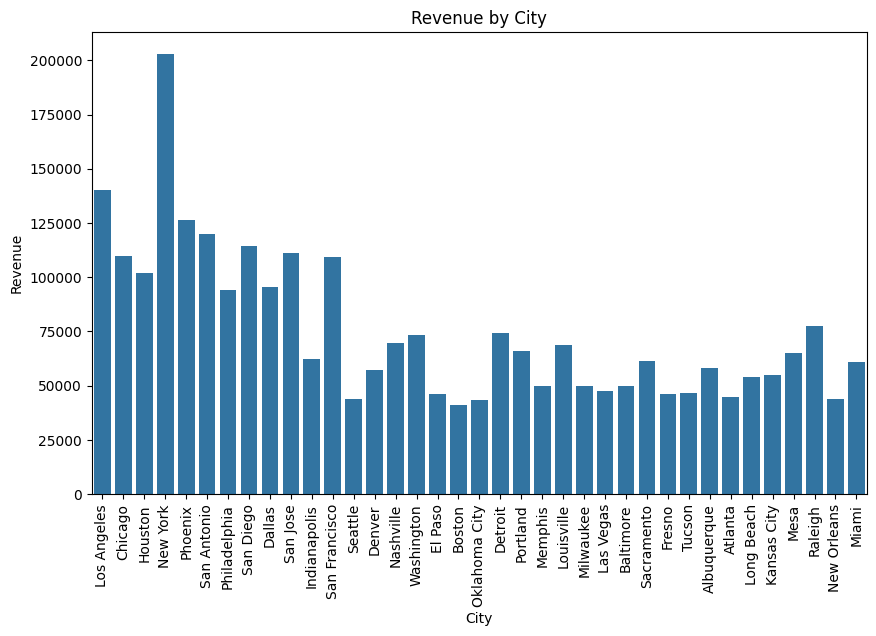

In [92]:
plt.figure(figsize=(10, 6))
sns.barplot(x='city', y='revenue', data=insight_revenue_city_wise_pd)
plt.title('Revenue by City')
plt.xlabel('City')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()


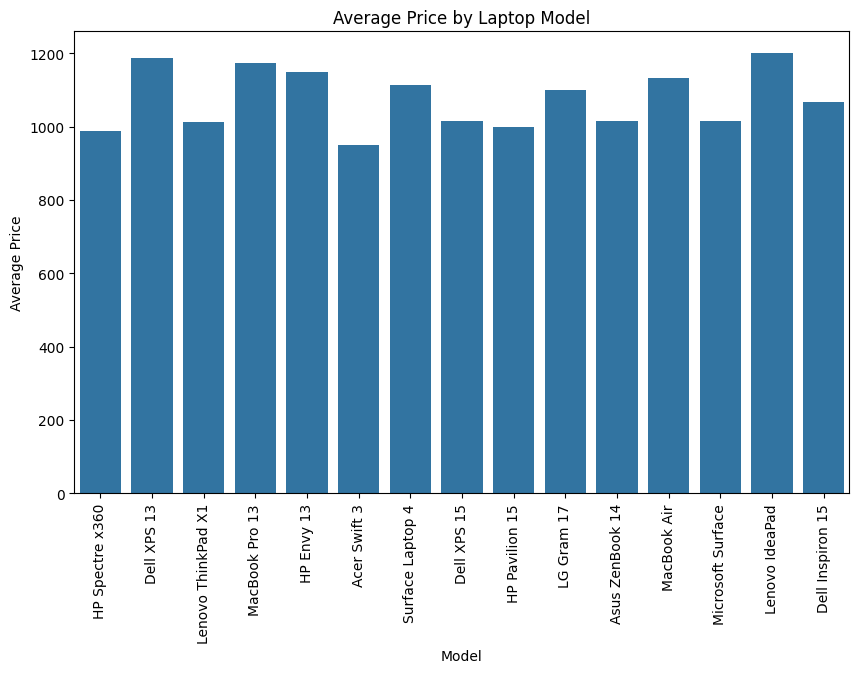

In [91]:
plt.figure(figsize=(10, 6))
sns.barplot(x='model', y='avg(price)', data=insight_model_wise_avg_pd)
plt.title('Average Price by Laptop Model')
plt.xlabel('Model')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()


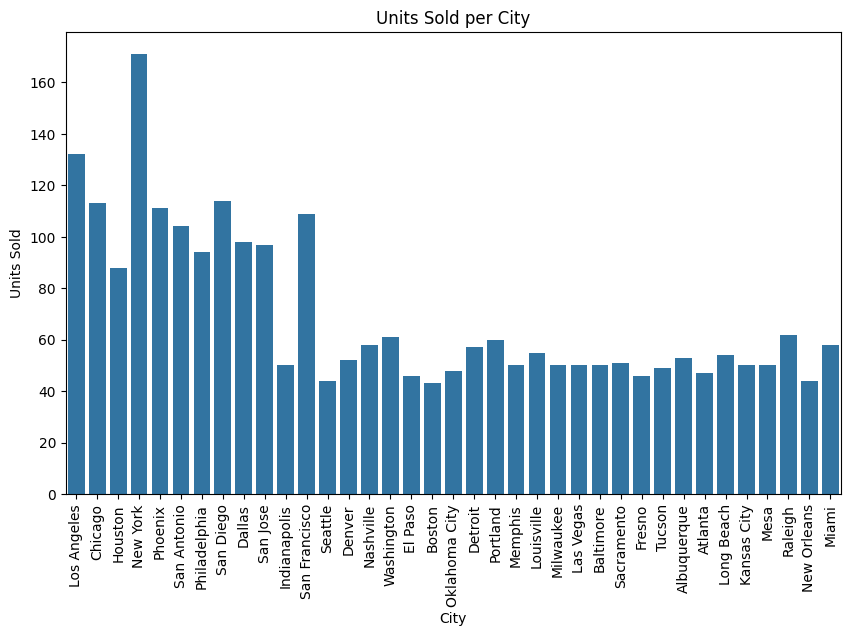

In [90]:
plt.figure(figsize=(10, 6))
sns.barplot(x='city', y='sum(units_sold)', data=insight_model_sold_per_city_pd)
plt.title('Units Sold per City')
plt.xlabel('City')
plt.ylabel('Units Sold')
plt.xticks(rotation=90)
plt.show()


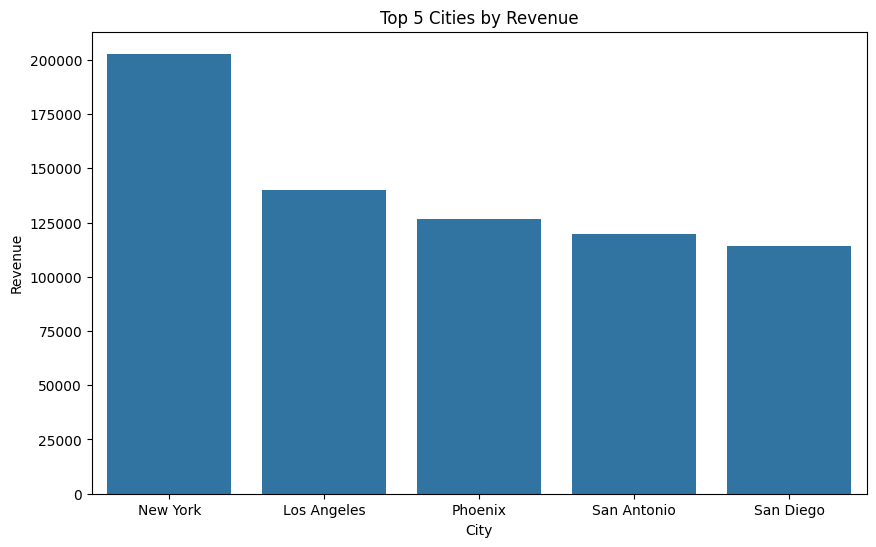

In [96]:
plt.figure(figsize=(10, 6))
sns.barplot(x='city', y='revenue', data=insight_top5_revenue_pd)
plt.title('Top 5 Cities by Revenue')
plt.xlabel('City')
plt.ylabel('Revenue')
plt.xticks(rotation=0)
plt.show()
